In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [2]:
cbsd = os.listdir(r"D:\Desktop\cassava_images\cleaned_images\cbsd")
print(cbsd[0:5])
print(cbsd[-5:])

['cbsd-1_1616821585769.jpg', 'cbsd-1_1616821602199.jpg', 'cbsd-1_1616821620031.jpg', 'cbsd-1_1616821639101.jpg', 'cbsd-1_1616821659385.jpg']
['cbsd-2_1617177026355.jpg', 'cbsd-2_1617177034266.jpg', 'cbsd-2_1617177043464.jpg', 'cbsd-2_1617177058368.jpg', 'cbsd-2_1617177065257.jpg']


In [3]:
cmd = os.listdir(r"D:\Desktop\cassava_images\cleaned_images\cmd")
print(cmd[0:5])
print(cmd[-5:])

['cmd_001_1616752728062.jpg', 'cmd_001_1616752820764.jpg', 'cmd_001_1616752829785.jpg', 'cmd_001_1616757624239.jpg', 'cmd_001_1616757680736.jpg']
['cmd_003_uuid_5e502c54-5f04-443d-a2a9-dbcf72b6785d.jpg', 'cmd_003_uuid_5e51a27d-eb86-4215-bc0d-bc81b7e1b911.jpg', 'cmd_003_uuid_5e7eedda-96ab-4b01-89e2-1786d34f3023.jpg', 'cmd_003_uuid_5e8d405c-47e7-427d-b597-c67a4d73aa7e.jpg', 'cmd_004_uuid_828a926e-22d3-4d59-8767-5640897be1cc.jpg']


In [4]:
healthy = os.listdir(r"D:\Desktop\cassava_images\cleaned_images\healthy")
print(healthy[0:5])
print(healthy[-5:])

['healthy_001_1616768350317.jpg', 'healthy_001_1616768361476.jpg', 'healthy_001_1616768363703.jpg', 'healthy_001_1616768373931.jpg', 'healthy_001_1616768383552.jpg']
['train-healthy-95.jpg', 'train-healthy-96.jpg', 'train-healthy-97.jpg', 'train-healthy-98.jpg', 'train-healthy-99.jpg']


In [5]:
print('Number of cbsd images:', len(cbsd))
print('Number of cmd images:', len(cmd))
print('Number of healthy images:', len(healthy))

Number of cbsd images: 1430
Number of cmd images: 1430
Number of healthy images: 1430


In [6]:
# create the labels

cbsd_labels = [0]*1430

cmd_labels = [1]*1430

healthy_labels = [2]*1430

In [7]:
print(cbsd_labels[0:5])

print(cmd_labels[0:5])
print(healthy_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [8]:
print(len(cbsd_labels))
print(len(cmd_labels))
print(len(healthy_labels))

1430
1430
1430


In [9]:
labels = cmd_labels + cbsd_labels + healthy_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

4290
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


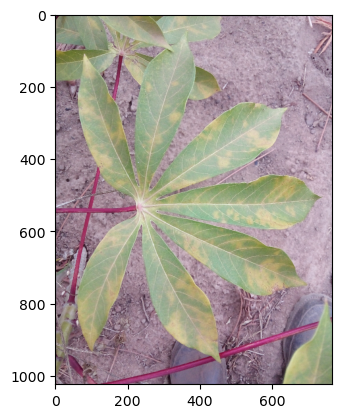

In [10]:
# displaying with cbsd image
img = mpimg.imread(r"D:\Desktop\cassava_images\cleaned_images\cbsd\cbsd-1_1616821639101.jpg")
imgplot = plt.imshow(img)
plt.show()

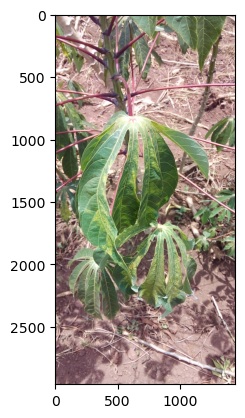

In [11]:
# displaying without cmd image
img = mpimg.imread(r"D:\Desktop\cassava_images\cleaned_images\cmd\cmd_001_1616752820764.jpg")
imgplot = plt.imshow(img)
plt.show()

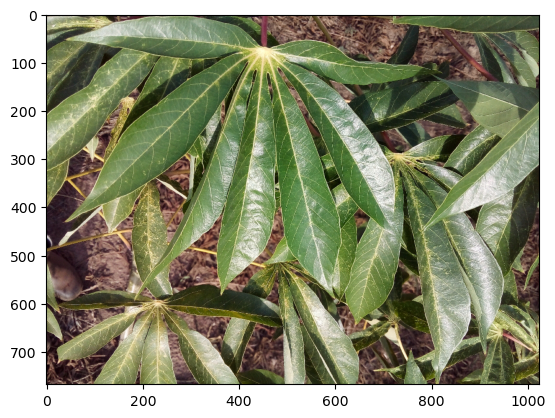

In [13]:
# displaying without healthy image
img = mpimg.imread(r"D:\Desktop\cassava_images\cleaned_images\healthy\healthy_001_1616768361476.jpg")
imgplot = plt.imshow(img)
plt.show()

In [18]:
# convert images to numpy arrays+

cbsd_path = 'D:/Desktop/cassava_images/cleaned_images/cbsd/'

data = []

for img_file in cbsd:

  image = Image.open(cbsd_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



cmd_path = 'D:/Desktop/cassava_images/cleaned_images/cmd/'


for img_file in cmd:

  image = Image.open(cmd_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
  
healthy_path = 'D:/Desktop/cassava_images/cleaned_images/healthy/'
for img_file in healthy:

  image = Image.open(healthy_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [19]:
type(data)

list

In [20]:
len(data)

4290

In [21]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(4290, 128, 128, 3)
(4290,)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(4290, 128, 128, 3) (3432, 128, 128, 3) (858, 128, 128, 3)


In [26]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [27]:
X_train[0]

array([[[ 59,  89,  40],
        [ 48,  91,  38],
        [ 48,  96,  41],
        ...,
        [ 40,  87,  36],
        [ 46,  93,  40],
        [ 57, 104,  46]],

       [[ 48,  90,  40],
        [ 47,  93,  40],
        [ 50,  98,  44],
        ...,
        [ 46,  93,  41],
        [ 63, 112,  47],
        [ 66, 121,  42]],

       [[ 47,  91,  41],
        [ 48,  94,  42],
        [ 53,  99,  49],
        ...,
        [ 76, 132,  59],
        [ 76, 132,  55],
        [ 87, 140,  58]],

       ...,

       [[ 16,  22,  11],
        [ 26,  57,  28],
        [ 28,  70,  27],
        ...,
        [ 24,  54,  15],
        [ 27,  61,  16],
        [ 33,  58,   9]],

       [[ 21,  23,  12],
        [ 39,  60,  44],
        [ 41,  83,  47],
        ...,
        [ 27,  61,  16],
        [ 30,  61,  10],
        [ 23,  52,   5]],

       [[ 29,  41,  20],
        [ 38,  60,  35],
        [ 41,  79,  45],
        ...,
        [ 31,  61,  14],
        [ 26,  58,   6],
        [ 10,  44,   0]]

In [28]:
X_train_scaled[0]

array([[[0.23137255, 0.34901961, 0.15686275],
        [0.18823529, 0.35686275, 0.14901961],
        [0.18823529, 0.37647059, 0.16078431],
        ...,
        [0.15686275, 0.34117647, 0.14117647],
        [0.18039216, 0.36470588, 0.15686275],
        [0.22352941, 0.40784314, 0.18039216]],

       [[0.18823529, 0.35294118, 0.15686275],
        [0.18431373, 0.36470588, 0.15686275],
        [0.19607843, 0.38431373, 0.17254902],
        ...,
        [0.18039216, 0.36470588, 0.16078431],
        [0.24705882, 0.43921569, 0.18431373],
        [0.25882353, 0.4745098 , 0.16470588]],

       [[0.18431373, 0.35686275, 0.16078431],
        [0.18823529, 0.36862745, 0.16470588],
        [0.20784314, 0.38823529, 0.19215686],
        ...,
        [0.29803922, 0.51764706, 0.23137255],
        [0.29803922, 0.51764706, 0.21568627],
        [0.34117647, 0.54901961, 0.22745098]],

       ...,

       [[0.0627451 , 0.08627451, 0.04313725],
        [0.10196078, 0.22352941, 0.10980392],
        [0.10980392, 0

In [29]:
import tensorflow as tf
from tensorflow import keras

c:\Users\ADMIN\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [30]:
num_of_classes = 3

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, batch_size=32, validation_split=0.1, epochs=10)

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 63s 636ms/step - accuracy: 0.3326 - loss: 1.0976 - val_accuracy: 0.4273 - val_loss: 1.0594
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 75s 771ms/step - accuracy: 0.4388 - loss: 1.0285 - val_accuracy: 0.4826 - val_loss: 0.9720
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 651ms/step - accuracy: 0.4666 - loss: 0.9914 - val_accuracy: 0.4477 - val_loss: 0.9864
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 55s 570ms/step - accuracy: 0.4909 - loss: 0.9567 - val_accuracy: 0.4419 - val_loss: 0.9972
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 75s 490ms/step - accuracy: 0.5094 - loss: 0.9319 - val_accuracy: 0.4913 - val_loss: 0.9419
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 57s 586ms/step - accuracy: 0.5304 - loss: 0.9017 - val_accuracy: 0.4884 - val_loss: 0.9291
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 47s 481ms/step - accuracy: 0.5755 - loss: 0.8655 - val_accuracy: 0.5465 - val_loss: 0.9052
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 57s 584ms/step - accuracy: 0.6321 - loss: 0.7802 - val_accu

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6142 - loss: 1.0596
Test Accuracy = 0.6142191290855408


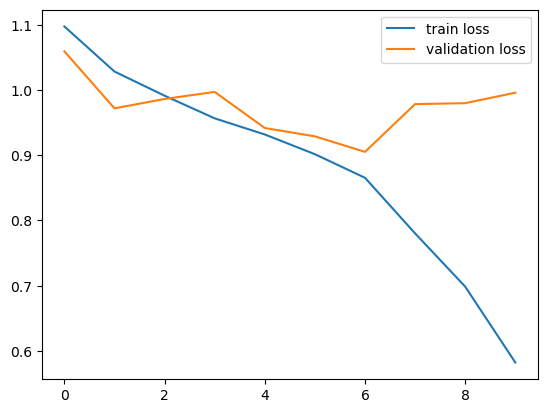

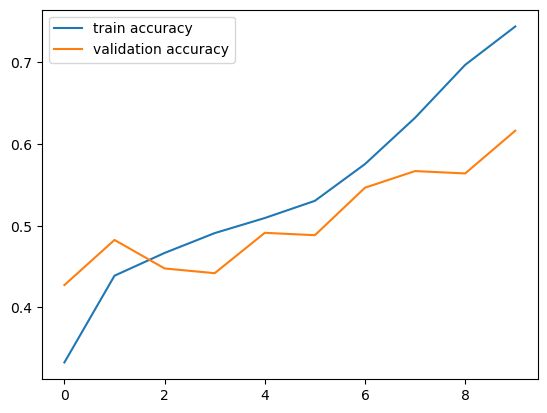

In [35]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [36]:
model.save('cassava_disease_model.keras')

In [ ]:
# Load the saved model and make predictions without retraining
from tensorflow import keras
model = keras.models.load_model('cassava_disease_model.keras')

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0:
    print('The plant in the image has Cassava Brown Streak Disease (CBSD)')
elif input_pred_label == 1:
    print('The plant in the image has Cassava Mosaic Disease (CMD)')
else:
    print('The plant in the image is Healthy')